# Deterministic Environment

### 1. Show and discuss the results after:
#### • Applying Q-learning to solve the deterministic environment defined in Part 1. Plots should include epsilon decay and total reward per episode.
#### • Applying Q-learning to solve the stochastic environment defined in Part 1. Plots should include epsilon decay and total reward per episode.
#### • Applying any other algorithm of your choice to solve the deterministic environment defined in Part 1. Plots should include total reward per episode.
#### • Applying any other algorithm of your choice to solve the stochastic environment defined in Part 1. Plots should include total reward per episode.
#### • Provide the evaluation results. Run your environment for at least 10 episodes, where the agent chooses only greedy actions from the learnt policy. Plot should include the total reward per episode.



In [1]:
import numpy as np
import gym 
import matplotlib.pyplot as plt
from gym import spaces
import random
import time
from IPython.display import clear_output

In [2]:
grid = np.zeros((4,4))
pos1 = (0,0)
pos2 = (3,3)
grid[tuple(pos1)] = 1.0
grid[tuple(pos2)] = 0.5

In [3]:
class GridEnvironment(gym.Env):
    def __init__(self):
        self.observation_space=spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 1000

    def reset(self):
        self.timestep = 0
        self.initial = [0,0]
        self.goal = [3,3]
        self.state = np.zeros((4,4))
        self.state[tuple(self.initial)]=1
        self.state[tuple(self.goal)]=0.5
        #self.state[tuple(initial)]= 1.0
        #self.state[tuple(cheese1)]= 0.7
        #self.state[tuple(cheese2)]= 0.7
        #self.state[tuple(cheese3)]= 0.7
        #self.state[tuple(coyote1)]= 0.3
        #self.state[tuple(coyote2)]= 0.3
        #self.state[tuple(coyote3)]= 0.3
        #self.state[tuple(trap1)] = 0.2
        #self.state[tuple(trap2)] = 0.2
        #self.state[tuple(gun)] = 0.1
        #self.state[tuple(jetpack)] = 0.8
        #self.state[tuple(goal)]=1.9

        observation =self.state.flatten()

        return observation

    def step(self,action):
        self.state = np.random.choice(self.observation_space.n)
        if action == 0:
            self.initial[0] +=1
        if action == 1:
            self.initial[0] -=1
        if action == 2:
            self.initial[1] +=1
        if action == 3:
            self.initial[1] -=1
        self.initial = np.clip(self.initial, 0 ,3)
        self.state = np.zeros((4,4))
        self.state[tuple(self.initial)]= 1.0
        self.state[tuple(self.goal)]= 0.5
        #self.state[tuple(cheese1)]= 0.7
        #self.state[tuple(cheese2)]= 0.7
        #self.state[tuple(cheese3)]= 0.7
        #self.state[tuple(coyote1)]= 0.3
        #self.state[tuple(coyote2)]= 0.3
        #self.state[tuple(coyote3)]= 0.3
        #self.state[tuple(trap1)] = 0.2
        #self.state[tuple(trap2)] = 0.2
        #self.state[tuple(gun)] = 0.1
        #self.state[tuple(jetpack)] = 0.8
        
        observation = self.state.flatten()

        reward=-1
        if(self.initial == self.goal).all():
            reward = 10
        if(self.initial == (1,1)).all():
            reward = 3
        if(self.initial == (0,3)).all():
            reward = -3
        if(self.initial == (3,0)).all():
            reward = -10

        self.timestep +=1 
        done = True if self.timestep >= self.max_timesteps else False #this didn't work for me

        info ={}

        return observation, reward, done, info

    def render(self):
        plt.imshow(self.state)

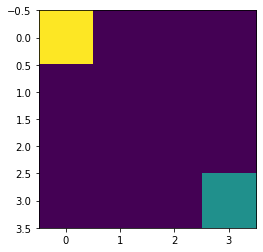

In [4]:
env = GridEnvironment()
obs = env.reset()
env.render()

## Q - Learning Deterministic

10


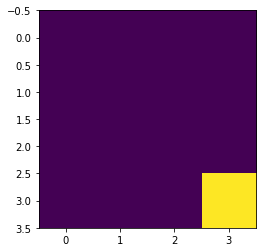

Done!
Total Rewards -  5
Number of Episodes -  22
Performance - Total Rewards/Number of Episodes 0.22727272727272727


In [5]:
qvalues = np.zeros((4,4,4))
epsilon = 0.9
discount_factor = 0.9
learning_rate = 0.9

decay = 0.9999
min_epsilon = 0.1
epsilon_arr = []
epsilon_arr.append(epsilon)
total_reward_arr = []
reward = -1
    
def greedy(cur_row,cur_col,epsilon):
    if np.random.random() < epsilon:
        return np.argmax(qvalues[cur_row,cur_col])
    else:
        return np.random.randint(4)
    
row,col = env.initial
total_rewards = 0
while ([row,col] != env.goal) and (env.timestep < env.max_timesteps):
    clear_output(wait=True)
    env.render()
    print(reward)
    plt.show()
    time.sleep(0.5)
    
    action = greedy(row,col,epsilon)
    old_row,old_col = row,col
    row, col = env.initial

    reward = env.step(action)[1]
    old_q = qvalues[old_row,old_col,action]
    td = reward + (discount_factor * np.max(qvalues[row,col])) - old_q

    new_q = old_q + (learning_rate * td)
    qvalues[old_row,old_col,action] = new_q
    
    total_rewards += reward
    epsilon = max(min_epsilon, epsilon*decay)
    epsilon_arr.append(epsilon)
    total_reward_arr.append(total_rewards/env.timestep)

print("Done!")
print("Total Rewards - ", total_rewards)
print("Number of Episodes - ", env.timestep)
print("Performance - Total Rewards/Number of Episodes",(total_rewards/env.timestep))

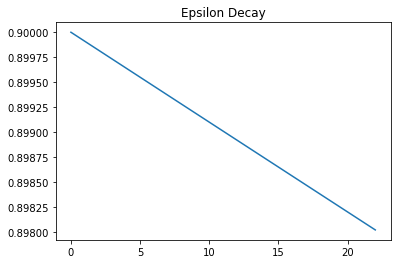

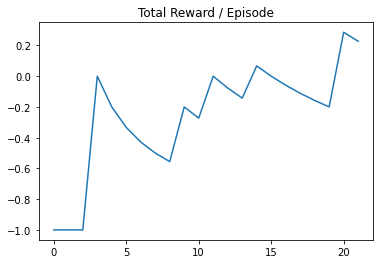

In [6]:
plt.plot(epsilon_arr)
plt.title('Epsilon Decay')
plt.show()

plt.plot(total_reward_arr)
plt.title('Total Reward / Episode')
plt.show()

graph_1 = total_reward_arr

## SARSA Deterministic

10


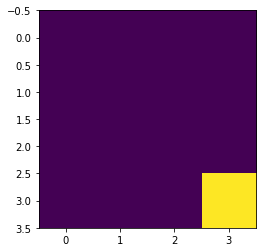

Done!
Total Rewards -  -6
Number of Episodes -  21
Performance - Total Rewards/Number of Episodes -0.2857142857142857


In [22]:
qvalues = np.zeros((4,4,4))
epsilon = 0.9
discount_factor = 0.9
learning_rate = 0.9

decay = 0.9999
min_epsilon = 0.1
epsilon_arr = []
epsilon_arr.append(epsilon)
total_reward_arr = []

def greedy(cur_row,cur_col,epsilon):
    if np.random.random() < epsilon:
        return np.argmax(qvalues[cur_row,cur_col])
    else:
        return np.random.randint(4)
    
row,col = env.initial
total_rewards = 0
while ([row,col] != env.goal) and (env.timestep < env.max_timesteps):
    clear_output(wait=True)
    env.render()
    print(reward)
    plt.show()
    time.sleep(0.5)
    
    action1 = greedy(row,col,epsilon)
    old_row,old_col = row,col
    row, col = env.initial
    reward = env.step(action1)[1]
    action2 = greedy(row,col,epsilon)

    old_q = qvalues[old_row,old_col,action1] 
    q2 = qvalues[row,col,action2]
    td = reward + (discount_factor * q2) - old_q 
    new_q = old_q + (learning_rate * td) 
    
    qvalues[old_row,old_col,action1] = new_q
    
    total_rewards += reward
    epsilon = max(min_epsilon, epsilon*decay)
    epsilon_arr.append(epsilon)
    total_reward_arr.append(total_rewards/env.timestep)

print("Done!")
print("Total Rewards - ", total_rewards)
print("Number of Episodes - ", env.timestep)
print("Performance - Total Rewards/Number of Episodes",(total_rewards/env.timestep))

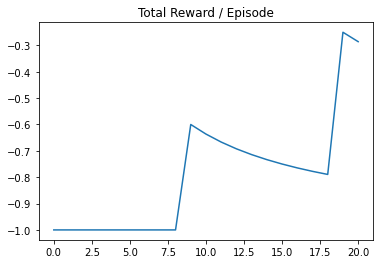

In [23]:
plt.plot(total_reward_arr)
plt.title('Total Reward / Episode')
plt.show()

graph_2 = total_reward_arr

# Stochastic Environment

In [7]:
class GridEnvironment(gym.Env):
    def __init__(self):
        self.observation_space=spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 1000

    def reset(self):
        self.timestep = 0
        self.initial = [0,0]
        self.goal = [3,3]
        self.state = np.zeros((4,4))
        self.state[tuple(self.initial)]=1
        self.state[tuple(self.goal)]=0.5
        #self.state[tuple(initial)]= 1.0
        #self.state[tuple(cheese1)]= 0.7
        #self.state[tuple(cheese2)]= 0.7
        #self.state[tuple(cheese3)]= 0.7
        #self.state[tuple(coyote1)]= 0.3
        #self.state[tuple(coyote2)]= 0.3
        #self.state[tuple(coyote3)]= 0.3
        #self.state[tuple(trap1)] = 0.2
        #self.state[tuple(trap2)] = 0.2
        #self.state[tuple(gun)] = 0.1
        #self.state[tuple(jetpack)] = 0.8
        #self.state[tuple(goal)]=1.9
        observation =self.state.flatten()

        return observation

    def step(self,action):
        self.state = np.random.choice(self.observation_space.n)
        randomizer = random.randint(1,100)
        if action == 0:
            if randomizer > 50:
                self.initial[0] +=0
            else:
                self.initial[0] +=1
        if action == 1:
            if randomizer > 50:
                self.initial[0] -=0
            else:
                self.initial[0] -=1
        if action == 2:
            if randomizer > 50:
                self.initial[1] +=0
            else:
                self.initial[1] +=1
        if action == 3:
            if randomizer > 50:
                self.initial[1] -=0
            else:
                self.initial[1] -=1
        self.initial = np.clip(self.initial, 0 ,3)
        self.state = np.zeros((4,4))
        self.state[tuple(self.initial)]= 1.0
        self.state[tuple(self.goal)]= 0.5
        #self.state[tuple(cheese1)]= 0.7
        #self.state[tuple(cheese2)]= 0.7
        #self.state[tuple(cheese3)]= 0.7
        #self.state[tuple(coyote1)]= 0.3
        #self.state[tuple(coyote2)]= 0.3
        #self.state[tuple(coyote3)]= 0.3
        #self.state[tuple(trap1)] = 0.2
        #self.state[tuple(trap2)] = 0.2
        #self.state[tuple(gun)] = 0.1
        #self.state[tuple(jetpack)] = 0.8
        observation = self.state.flatten()

        reward = -1
        if(self.initial == self.goal).all():
            reward = 10
        if(self.initial == (1,1)).all():
            reward = 3
        if(self.initial == (0,3)).all():
            reward = -3
        if(self.initial == (3,0)).all():
            reward = -10

        self.timestep +=1
        done = True if self.timestep >= self.max_timesteps else False

        info ={}

        return observation, reward, done, info

    def render(self):
        plt.imshow(self.state)

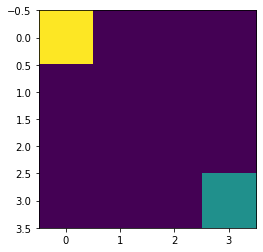

In [10]:
env = GridEnvironment()
obs = env.reset()
env.render()

## Q-Learning Stochastic

10


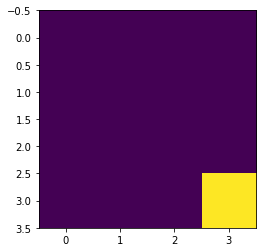

Done!
Total Rewards -  13
Number of Episodes -  33
Performance - Total Rewards/Number of Episodes 0.3939393939393939


In [11]:
qvalues = np.zeros((4,4,4))
epsilon = 0.9
discount_factor = 0.9
learning_rate = 0.9

decay = 0.9999
min_epsilon = 0.1
epsilon_arr = []
epsilon_arr.append(epsilon)
total_reward_arr = []
    
def greedy(cur_row,cur_col,epsilon):
    if np.random.random() < epsilon:
        return np.argmax(qvalues[cur_row,cur_col])
    else:
        return np.random.randint(4)
    
row,col = env.initial
total_rewards = 0
while ([row,col] != env.goal) and (env.timestep < env.max_timesteps):
    clear_output(wait=True)
    env.render()
    print(reward)
    plt.show()
    time.sleep(1)
    
    action = greedy(row,col,epsilon)
    old_row,old_col = row,col
    row, col = env.initial

    reward = env.step(action)[1]
    old_q = qvalues[old_row,old_col,action]
    td = reward + (discount_factor * np.max(qvalues[row,col])) - old_q

    new_q = old_q + (learning_rate * td)
    qvalues[old_row,old_col,action] = new_q
    
    total_rewards += reward
    epsilon = max(min_epsilon, epsilon*decay)
    epsilon_arr.append(epsilon)
    total_reward_arr.append(total_rewards/env.timestep)

print("Done!")
print("Total Rewards - ", total_rewards)
print("Number of Episodes - ", env.timestep)
print("Performance - Total Rewards/Number of Episodes",(total_rewards/env.timestep))

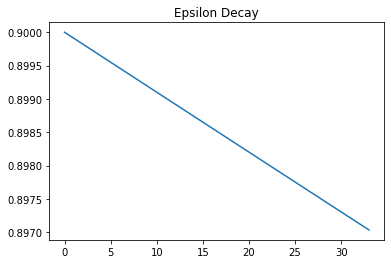

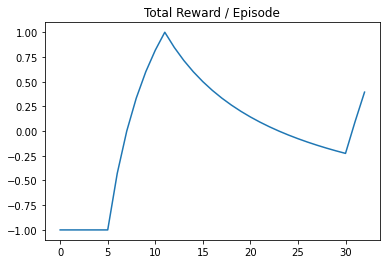

In [12]:
plt.plot(epsilon_arr)
plt.title('Epsilon Decay')
plt.show()

plt.plot(total_reward_arr)
plt.title('Total Reward / Episode')
plt.show()

graph_3 = total_reward_arr

# SARSA Stochastic

10


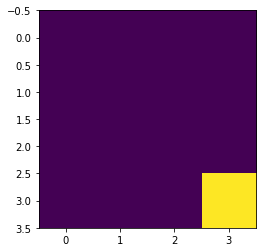

Done!
Total Rewards -  -264
Number of Episodes -  247
Performance - Total Rewards/Number of Episodes -1.0688259109311742


In [29]:
qvalues = np.zeros((4,4,4))
epsilon = 0.9
discount_factor = 0.9
learning_rate = 0.9

decay = 0.9999
min_epsilon = 0.1
epsilon_arr = []
epsilon_arr.append(epsilon)
total_reward_arr = []

def greedy(cur_row,cur_col,epsilon):
    if np.random.random() < epsilon:
        return np.argmax(qvalues[cur_row,cur_col])
    else:
        return np.random.randint(4)
    
row,col = env.initial
total_rewards = 0
while ([row,col] != env.goal) and (env.timestep < env.max_timesteps):
    clear_output(wait=True)
    env.render()
    print(reward)
    plt.show()
    time.sleep(1)
    
    action1 = greedy(row,col,epsilon)
    old_row,old_col = row,col
    row, col = env.initial
    reward = env.step(action1)[1]
    action2 = greedy(row,col,epsilon)

    old_q = qvalues[old_row,old_col,action1] 
    q2 = qvalues[row,col,action2]
    td = reward + (discount_factor * q2) - old_q 
    new_q = old_q + (learning_rate * td) 
    
    qvalues[old_row,old_col,action1] = new_q
    
    total_rewards += reward
    epsilon = max(min_epsilon, epsilon*decay)
    epsilon_arr.append(epsilon)
    total_reward_arr.append(total_rewards/env.timestep)

print("Done!")
print("Total Rewards - ", total_rewards)
print("Number of Episodes - ", env.timestep)
print("Performance - Total Rewards/Number of Episodes",(total_rewards/env.timestep))

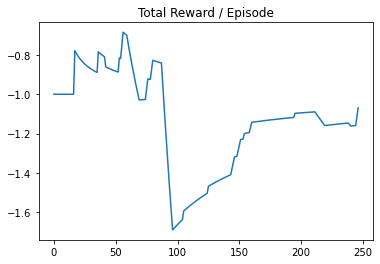

In [30]:
plt.plot(total_reward_arr)
plt.title('Total Reward / Episode')
plt.show()

graph_4 = total_reward_arr

### 2. Compare the performance of both algorithms on the same deterministic environment (e.g. show one graph with two reward dynamics) and give your interpretation of the results.

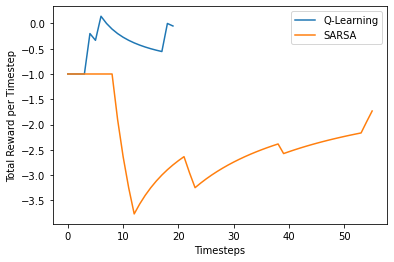

In [47]:
plt.plot(graph_1, label="Q-Learning")
plt.plot(graph_3, label="SARSA")
plt.xlabel("Timesteps")
plt.ylabel("Total Reward per Timestep")
plt.legend()
plt.show()

### 3. Compare how both algorithms perform in the same stochastic environment (e.g. show one graph with two reward dynamics) and give your interpretation of the results.

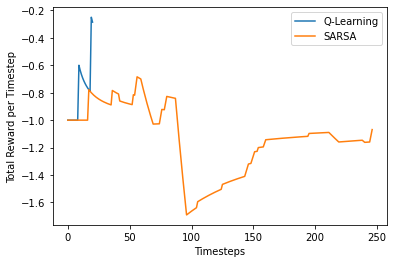

In [48]:
plt.plot(graph_2, label="Q-Learning")
plt.plot(graph_4, label="SARSA")
plt.xlabel("Timesteps")
plt.ylabel("Total Reward per Timestep")
plt.legend()
plt.show()